In [1]:
from sage.misc.html import latex
%display latex

In [2]:
var("z epsilon tau")

(z, epsilon, tau)

In [3]:
ep = epsilon
t = tau
ep

epsilon

In [4]:
rhs = -1/(1 + ep * z)**2
rhs

-1/(epsilon*z + 1)^2

In [5]:
rhs_taylor = rhs.taylor(ep, 0, 4)
latex(rhs_taylor)

-5 \, \epsilon^{4} z^{4} + 4 \, \epsilon^{3} z^{3} - 3 \, \epsilon^{2} z^{2} + 2 \, \epsilon z - 1

In [6]:
z_expanded = 0
for i in range(5):
    z_expanded += function(f"z{i}")(t) * ep**i
z_expanded

epsilon^4*z4(tau) + epsilon^3*z3(tau) + epsilon^2*z2(tau) + epsilon*z1(tau) + z0(tau)

In [7]:
rhs_expanded = rhs_taylor.substitute(z=z_expanded).expand().collect(ep)

In [8]:
lhs = 0
for i in range(5):
    lhs += derivative(function(f"z{i}")(t), t, 2) * ep**i
lhs

epsilon^4*diff(z4(tau), tau, tau) + epsilon^3*diff(z3(tau), tau, tau) + epsilon^2*diff(z2(tau), tau, tau) + epsilon*diff(z1(tau), tau, tau) + diff(z0(tau), tau, tau)

In [9]:
equations = (rhs_expanded - lhs).collect(ep).coefficients(ep, sparse=False)[:6]
[e == 0 for e in equations]

[-diff(z0(tau), tau, tau) - 1 == 0,
 2*z0(tau) - diff(z1(tau), tau, tau) == 0,
 -3*z0(tau)^2 + 2*z1(tau) - diff(z2(tau), tau, tau) == 0,
 4*z0(tau)^3 - 6*z0(tau)*z1(tau) + 2*z2(tau) - diff(z3(tau), tau, tau) == 0,
 -5*z0(tau)^4 + 12*z0(tau)^2*z1(tau) - 3*z1(tau)^2 - 6*z0(tau)*z2(tau) + 2*z3(tau) - diff(z4(tau), tau, tau) == 0,
 -20*z0(tau)^3*z1(tau) + 12*z0(tau)*z1(tau)^2 + 12*z0(tau)^2*z2(tau) - 6*z1(tau)*z2(tau) - 6*z0(tau)*z3(tau) + 2*z4(tau) == 0]

In [10]:
i = 0

eqn = integrate(equations[i] == 0, t)
eqn = eqn - eqn.left().operands()[0]
eqn *= -1
eqn

diff(z0(tau), tau) == -c1 - tau

In [11]:
term_at_t0 = eqn.right().substitute(t==0)
constant = solve(term_at_t0 == 1, term_at_t0.variables()[0])
constant

[c1 == -1]

In [12]:
eqn = eqn.substitute(constant)

In [13]:
eqn = integrate(eqn, t)
eqn

z0(tau) == -1/2*tau^2 + c2 + tau

In [14]:
term_at_t0 = eqn.right().substitute(t==0)
constant = solve(term_at_t0 == 0, term_at_t0.variables()[0])
constant

[c2 == 0]

In [15]:
eqn = eqn.substitute(constant)
eqn

z0(tau) == -1/2*tau^2 + tau

In [16]:
eqns = [None for _ in range(4)]
eqns[0] = eqn

In [17]:
def solve_fn(eqn, function):
    eqn = eqn.substitute({function: var("tempy")})
    eqn = eqn.solve(var("tempy"))[0]
    eqn = eqn.substitute({var("tempy"):function})
    return eqn

In [18]:
for i in range(1, 4):

    eqns[i] = integrate(equations[i], t) == var("c")
    eqns[i].show()
    for j in range(i):
        eqns[i] = eqns[i].substitute({eqns[j].left():eqns[j].right()})
    eqns[i].show()
    eqns[i] = eqns[i].simplify_full()
    eqns[i].show()
    print("hi")
    subterm = eqns[i].substitute({derivative(function(f"z{i}")(t), t):var("dzidt")}).solve(dzidt)
    subterm[0].show()
    subterm = (subterm[0].right() == 0).substitute(t==0)

    subterm.show()

    subterm = subterm.solve(subterm.variables()[0])[0]

    subterm.show()

    eqns[i] = eqns[i].substitute(subterm)

    eqns[i] = integrate(eqns[i], t)
    eqns[i].show()

    eqns[i] = solve_fn(eqns[i], function(f"z{i}")(t))
    eqns[i].show()

    subterm = (eqns[i].right().substitute(t==0)==0)
    subterm = subterm.solve(subterm.variables()[0])[0]
    subterm.show()

    eqns[i] = eqns[i].substitute(subterm)
    
    eqns[i].show()

eqns

// Giac share root-directory:/media/data/anaconda3/envs/sage2/lib/python3.9/site-packages/sage/libs/giac/../../../../../../share/giac/
// Giac share root-directory:/media/data/anaconda3/envs/sage2/lib/python3.9/site-packages/sage/libs/giac/../../../../../../share/giac/
Added 0 synonyms


integrate(2*z0(tau) - diff(z1(tau), tau, tau), tau) == c

-1/3*tau^3 + tau^2 - diff(z1(tau), tau) == c

-1/3*tau^3 + tau^2 - diff(z1(tau), tau) == c

hi


dzidt == -1/3*tau^3 + tau^2 - c

-c == 0

c == 0

-1/12*tau^4 + 1/3*tau^3 - z1(tau) == c3

z1(tau) == -1/12*tau^4 + 1/3*tau^3 - c3

c3 == 0

z1(tau) == -1/12*tau^4 + 1/3*tau^3

integrate(-3*z0(tau)^2 + 2*z1(tau) - diff(z2(tau), tau, tau), tau) == c

-1/30*tau^5 + 1/6*tau^4 - 1/4*integrate(3*tau^4, tau) - 1/4*integrate(-12*tau^3, tau) - 1/4*integrate(12*tau^2, tau) - 1/4*integrate(4*diff(z2(tau), tau, tau), tau) == c

-11/60*tau^5 + 11/12*tau^4 - tau^3 - diff(z2(tau), tau) == c

hi


dzidt == -11/60*tau^5 + 11/12*tau^4 - tau^3 - c

-c == 0

c == 0

-11/360*tau^6 + 11/60*tau^5 - 1/4*tau^4 - z2(tau) == c4

z2(tau) == -11/360*tau^6 + 11/60*tau^5 - 1/4*tau^4 - c4

c4 == 0

z2(tau) == -11/360*tau^6 + 11/60*tau^5 - 1/4*tau^4

integrate(4*z0(tau)^3 - 6*z0(tau)*z1(tau) + 2*z2(tau) - diff(z3(tau), tau, tau), tau) == c

-2/45*tau^7 + 14/45*tau^6 - 1/2*tau^5 - 1/2*integrate(tau^6, tau) - 1/2*integrate(-6*tau^5, tau) - 1/2*integrate(12*tau^4, tau) - 1/2*integrate(-8*tau^3, tau) - 1/2*integrate(2*diff(z3(tau), tau, tau), tau) == c

-73/630*tau^7 + 73/90*tau^6 - 17/10*tau^5 + tau^4 - diff(z3(tau), tau) == c

hi


dzidt == -73/630*tau^7 + 73/90*tau^6 - 17/10*tau^5 + tau^4 - c

-c == 0

c == 0

-73/5040*tau^8 + 73/630*tau^7 - 17/60*tau^6 + 1/5*tau^5 - z3(tau) == c5

z3(tau) == -73/5040*tau^8 + 73/630*tau^7 - 17/60*tau^6 + 1/5*tau^5 - c5

c5 == 0

z3(tau) == -73/5040*tau^8 + 73/630*tau^7 - 17/60*tau^6 + 1/5*tau^5

[z0(tau) == -1/2*tau^2 + tau,
 z1(tau) == -1/12*tau^4 + 1/3*tau^3,
 z2(tau) == -11/360*tau^6 + 11/60*tau^5 - 1/4*tau^4,
 z3(tau) == -73/5040*tau^8 + 73/630*tau^7 - 17/60*tau^6 + 1/5*tau^5]

In [19]:
z_series = sum(eqns[i].right() * ep **i for i in range(4))

z_series

-1/5040*(73*tau^8 - 584*tau^7 + 1428*tau^6 - 1008*tau^5)*epsilon^3 - 1/360*(11*tau^6 - 66*tau^5 + 90*tau^4)*epsilon^2 - 1/12*(tau^4 - 4*tau^3)*epsilon - 1/2*tau^2 + tau

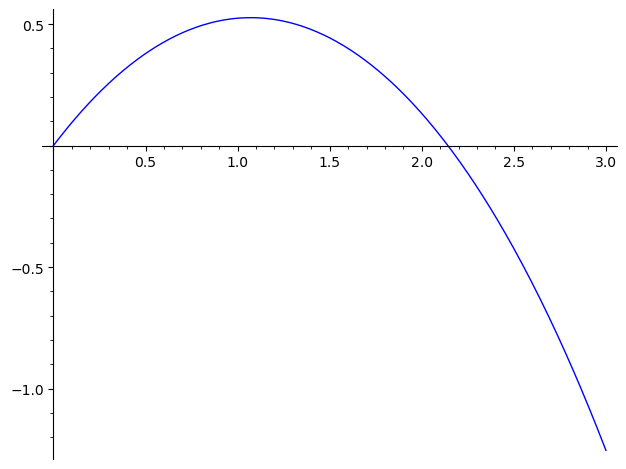

In [20]:
plot(z_series.substitute(ep==.1), t, 0, 3)

In [21]:
velocity = derivative(z_series, t)

velocity

-1/630*(73*tau^7 - 511*tau^6 + 1071*tau^5 - 630*tau^4)*epsilon^3 - 1/60*(11*tau^5 - 55*tau^4 + 60*tau^3)*epsilon^2 - 1/3*(tau^3 - 3*tau^2)*epsilon - tau + 1

In [22]:
velocity == 0

-1/630*(73*tau^7 - 511*tau^6 + 1071*tau^5 - 630*tau^4)*epsilon^3 - 1/60*(11*tau^5 - 55*tau^4 + 60*tau^3)*epsilon^2 - 1/3*(tau^3 - 3*tau^2)*epsilon - tau + 1 == 0

In [23]:
apex_time = var("apex_time", latex_name="\\tau_{apex}")
series_apex = apex_time == sum(var(f"a{i}")*ep^i for i in range(5))
series_apex.show()

apex_time == a4*epsilon^4 + a3*epsilon^3 + a2*epsilon^2 + a1*epsilon + a0

In [24]:
expanded_apex_time = (velocity).substitute(t==apex_time).substitute(series_apex).expand().collect(ep).coefficients(ep, sparse=False)
expanded_apex_time[:5]

[-a0 + 1,
 -1/3*a0^3 + a0^2 - a1,
 -11/60*a0^5 + 11/12*a0^4 - a0^3 - a0^2*a1 + 2*a0*a1 - a2,
 -73/630*a0^7 + 73/90*a0^6 - 17/10*a0^5 - 11/12*a0^4*a1 + a0^4 + 11/3*a0^3*a1 - 3*a0^2*a1 - a0*a1^2 - a0^2*a2 + a1^2 + 2*a0*a2 - a3,
 -73/90*a0^6*a1 + 73/15*a0^5*a1 - 17/2*a0^4*a1 - 11/6*a0^3*a1^2 - 11/12*a0^4*a2 + 4*a0^3*a1 + 11/2*a0^2*a1^2 + 11/3*a0^3*a2 - 3*a0*a1^2 - 1/3*a1^3 - 3*a0^2*a2 - 2*a0*a1*a2 - a0^2*a3 + 2*a1*a2 + 2*a0*a3 - a4]

In [25]:
apex_eqns = [None for _ in range(4)]

for i in range(4):
    apex_eqns[i] = expanded_apex_time[i] == 0
    apex_eqns[i] = apex_eqns[i].solve(var(f"a{i}"))[0]
    apex_eqns[i].show()
    for j in range(i):
        apex_eqns[i] = apex_eqns[i].substitute(apex_eqns[j])
    apex_eqns[i].show()
    

a0 == 1

a0 == 1

a1 == -1/3*a0^3 + a0^2

a1 == (2/3)

a2 == -11/60*a0^5 + 11/12*a0^4 - a0^3 - (a0^2 - 2*a0)*a1

a2 == (2/5)

a3 == -73/630*a0^7 + 73/90*a0^6 - 17/10*a0^5 + a0^4 - (a0 - 1)*a1^2 - 1/12*(11*a0^4 - 44*a0^3 + 36*a0^2)*a1 - (a0^2 - 2*a0)*a2

a3 == (8/35)

In [26]:
show(series_apex.substitute(apex_eqns))

apex_time == a4*epsilon^4 + 8/35*epsilon^3 + 2/5*epsilon^2 + 2/3*epsilon + 1

In [27]:
print(ep)

epsilon


# Problem 2

In [28]:
eqn = derivative(function("z")(t), t, 2) == rhs.substitute({var("z"):function("z")(t)})
eqn.show()

eqn = eqn * derivative(z(t), t)
eqn.show()

eqn = integrate(eqn, t)
eqn *= 2
eqn.show()



integration_constant = (eqn.right().substitute({z(t):0}) == 1).solve(eqn.right().variables()[0])

integration_constant[0].show()

eqn = eqn.substitute(integration_constant)

eqn.show()

zprime = sqrt(eqn.right().substitute({function("z")(t):var("z")}))

zprime

diff(z(tau), tau, tau) == -1/(epsilon*z(tau) + 1)^2

diff(z(tau), tau)*diff(z(tau), tau, tau) == -diff(z(tau), tau)/(epsilon*z(tau) + 1)^2

diff(z(tau), tau)^2 == 2*c6 + 2/((epsilon*z(tau) + 1)*epsilon)

c6 == 1/2*(epsilon - 2)/epsilon

diff(z(tau), tau)^2 == (epsilon - 2)/epsilon + 2/((epsilon*z(tau) + 1)*epsilon)

sqrt((epsilon - 2)/epsilon + 2/((epsilon*z + 1)*epsilon))

verbose 0 (3885: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 189 points.
verbose 0 (3885: plot.py, generate_plot_points) Last error message: 'Unable to compute f(10.0)'
verbose 0 (3885: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 189 points.
verbose 0 (3885: plot.py, generate_plot_points) Last error message: 'Unable to compute f(10.0)'
verbose 0 (3885: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 189 points.
verbose 0 (3885: plot.py, generate_plot_points) Last error message: 'Unable to compute f(10.0)'
verbose 0 (3885: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 187 points.
verbose 0 (3885: plot.py, generate_plot_points) Last error message: 'Unable to compute f(10.0)'
verbose 0 (3885: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 185 points.
verbose 0 (3885: plot.py, generate_plot_p

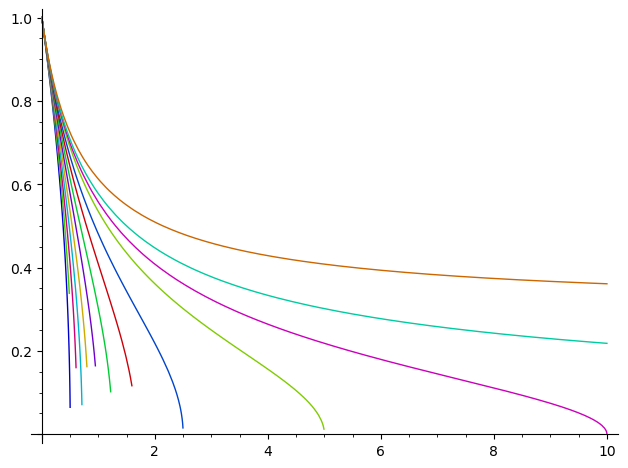

In [62]:
plot(zprime.substitute(ep==0.01), z0, 0, 10)
plot([zprime.substitute(ep==epp) for epp in [.01, .2, .4, .6, .8, 1, 1.2, 1.4, 1.6, 1.8, 1.9, 2, 2.2]], z, 0, 10)

verbose 0 (3885: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 190 points.
verbose 0 (3885: plot.py, generate_plot_points) Last error message: 'Unable to compute f(10.0)'
verbose 0 (3885: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 188 points.
verbose 0 (3885: plot.py, generate_plot_points) Last error message: 'Unable to compute f(10.0)'
verbose 0 (3885: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 187 points.
verbose 0 (3885: plot.py, generate_plot_points) Last error message: 'Unable to compute f(10.0)'
verbose 0 (3885: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 186 points.
verbose 0 (3885: plot.py, generate_plot_points) Last error message: 'Unable to compute f(10.0)'
verbose 0 (3885: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 183 points.
verbose 0 (3885: plot.py, generate_plot_p

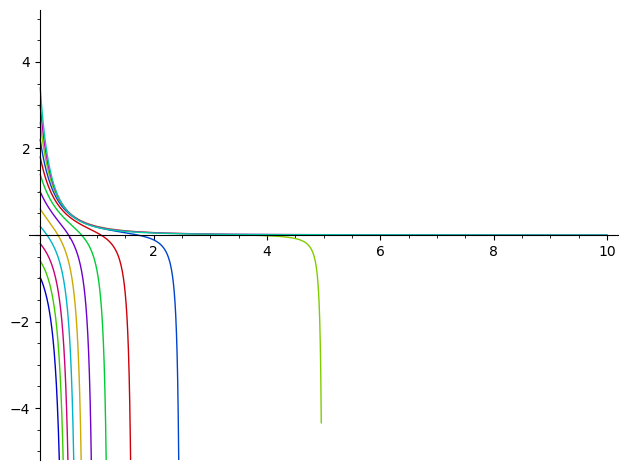

In [69]:
plot([derivative(zprime, z, 2).substitute(ep==epp) for epp in [.01, .2, .4, .6, .8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2]], z, 0, 10, ymin=-5, ymax=5)

In [68]:
plot?

# Problem 3

In [30]:
zprime = zprime.simplify_full()

In [58]:
assume(ep < 2)
assume(ep > 0)
t_apex = integral(1 / zprime, z, 0, 1/(2 - ep),)

t_apex = t_apex.canonicalize_radical().substitute(ep==3/2).numerical_approx()
t_apex

6.83679830462458

In [59]:
var("u")
integral(-1 / ep * sqrt((3 - u) / (1 - u + 2 - 2 * (-u + 2) / ep)), u, 2, (3 * ep - 4) / (ep - 2)).substitute(ep==3/2).numerical_approx()

6.83679830462458

In [32]:
t_apex.taylor(ep, 0, 4)

8/63*epsilon^4 + 8/35*epsilon^3 + 2/5*epsilon^2 + 2/3*epsilon + 1

In [33]:
t_apex.substitute(epsilon==0, )

1

In [34]:
t_apex.substitute?

# Problem 4

Solving forward in time from the apex

In [35]:
function("v")(t) == -zprime

v(tau) == -sqrt(((epsilon - 2)*z + 1)/(epsilon*z + 1))

solving backwards in time from the apex, 

In [36]:
function("v")(t) == zprime

v(tau) == sqrt(((epsilon - 2)*z + 1)/(epsilon*z + 1))

By the existence and uniqeness theorem, these solutions will have the same initial conditions and so be the same, just mirrored.

# Problem 5

In [37]:
z

z

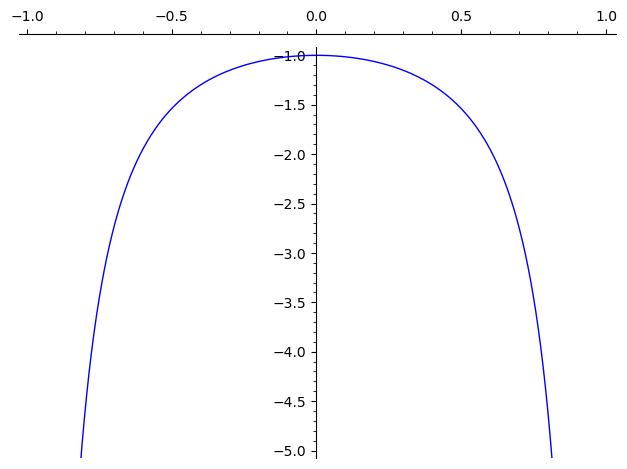

In [74]:
plot(derivative(sqrt(1 - x^2), x, 2), ymin=-5)